# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
#    if flatten:
#        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation="relu", padding='same', name="Hidden_Layer_1", input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation="relu", padding='same', name="Hidden_Layer_2"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation="relu", padding='same', name="Hidden_Layer_3"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding='same', name="Hidden_Layer_4"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation="relu", name="Hidden_Layer_5"))
    model.add(Dropout(0.5))

    model.add(Dense(output_classes, activation="softmax")) # 最後一層用softmax作為激活函數
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
BATCH_SIZE = 64
output_classes = 10
EPOCHS = 20
learning_rate = [1e-2, 1e-4]

In [7]:
SGD_results = {}
RMSProp_results = {}
AdaGrad_results = {}
Adam_results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f on SGD" % (lr))
        
    model = build_mlp(x_train.shape[1:], output_classes)
    model.summary()
        
    # Optimizer - SGD
    opt = keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-SGD" % str(lr)
    SGD_results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0718 12:16:46.106763  3600 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 12:16:46.106763  3600 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 12:16:46.106763  3600 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 12:16:46.106763  3600 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 12:16:46.113979  3

Experiment with LR = 0.010000 on SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
Hidden_Layer_2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
Hidden_Layer_3 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
Hidden_Layer_4 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 

50000/50000 [==============================] - 6s 120us/step - loss: 1.9190 - acc: 0.3067 - val_loss: 1.8451 - val_acc: 0.3591
Epoch 12/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.8943 - acc: 0.3183 - val_loss: 1.8167 - val_acc: 0.3715
Epoch 13/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.8662 - acc: 0.3248 - val_loss: 1.7966 - val_acc: 0.3778
Epoch 14/20
50000/50000 [==============================] - 6s 121us/step - loss: 1.8403 - acc: 0.3383 - val_loss: 1.7622 - val_acc: 0.3882
Epoch 15/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.8094 - acc: 0.3503 - val_loss: 1.7226 - val_acc: 0.3965
Epoch 16/20
50000/50000 [==============================] - 6s 120us/step - loss: 1.7768 - acc: 0.3597 - val_loss: 1.6907 - val_acc: 0.4043
Epoch 17/20
50000/50000 [==============================] - 6s 122us/step - loss: 1.7543 - acc: 0.3680 - val_loss: 1.6696 - val_acc: 0.4085
Epoch 18/20
50000/50000 [==============

In [8]:
for lr in learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f on RMSProp" % (lr))
        
    model = build_mlp(x_train.shape[1:], output_classes)
    model.summary()
        
    # Optimizer - RMSProp
    opt = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-RMSProp" % str(lr)
    RMSProp_results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.010000 on RMSProp
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
Hidden_Layer_2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
Hidden_Layer_3 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
Hidden_Layer_4 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None,

50000/50000 [==============================] - 6s 128us/step - loss: 0.9430 - acc: 0.6688 - val_loss: 0.8952 - val_acc: 0.6867
Epoch 11/20
50000/50000 [==============================] - 6s 128us/step - loss: 0.9120 - acc: 0.6813 - val_loss: 0.8803 - val_acc: 0.6916
Epoch 12/20
50000/50000 [==============================] - 6s 128us/step - loss: 0.8800 - acc: 0.6916 - val_loss: 0.8762 - val_acc: 0.6927
Epoch 13/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.8591 - acc: 0.7003 - val_loss: 0.8417 - val_acc: 0.7038
Epoch 14/20
50000/50000 [==============================] - 6s 128us/step - loss: 0.8321 - acc: 0.7113 - val_loss: 0.8441 - val_acc: 0.7075
Epoch 15/20
50000/50000 [==============================] - 6s 128us/step - loss: 0.8129 - acc: 0.7179 - val_loss: 0.7957 - val_acc: 0.7202
Epoch 16/20
50000/50000 [==============================] - 6s 128us/step - loss: 0.7933 - acc: 0.7221 - val_loss: 0.8145 - val_acc: 0.7151
Epoch 17/20
50000/50000 [==============

In [9]:
for lr in learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f on AdaGrad" % (lr))
        
    model = build_mlp(x_train.shape[1:], output_classes)
    model.summary()
        
    # Optimizer - AdaGrad
    opt = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-AdaGrad" % str(lr)
    AdaGrad_results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.010000 on AdaGrad
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
Hidden_Layer_2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
Hidden_Layer_3 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
Hidden_Layer_4 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None,

Epoch 11/20
50000/50000 [==============================] - 6s 126us/step - loss: 1.8967 - acc: 0.3185 - val_loss: 1.8542 - val_acc: 0.3575
Epoch 12/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8808 - acc: 0.3272 - val_loss: 1.8361 - val_acc: 0.3635
Epoch 13/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8659 - acc: 0.3324 - val_loss: 1.8189 - val_acc: 0.3694
Epoch 14/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8523 - acc: 0.3374 - val_loss: 1.8059 - val_acc: 0.3723
Epoch 15/20
50000/50000 [==============================] - 6s 126us/step - loss: 1.8386 - acc: 0.3409 - val_loss: 1.7909 - val_acc: 0.3756
Epoch 16/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8277 - acc: 0.3447 - val_loss: 1.7791 - val_acc: 0.3793
Epoch 17/20
50000/50000 [==============================] - 6s 126us/step - loss: 1.8168 - acc: 0.3462 - val_loss: 1.7696 - val_acc: 0.3809
Epoch 18/20
50000/50000 [==

In [10]:
for lr in learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f on Adam" % (lr))
        
    model = build_mlp(x_train.shape[1:], output_classes)
    model.summary()
        
    # Optimizer - Adam
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-Adam" % str(lr)
    Adam_results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.010000 on Adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
Hidden_Layer_2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
Hidden_Layer_3 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
Hidden_Layer_4 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8,

50000/50000 [==============================] - 7s 135us/step - loss: 0.9058 - acc: 0.6812 - val_loss: 0.8778 - val_acc: 0.6937
Epoch 12/20
50000/50000 [==============================] - 7s 135us/step - loss: 0.8726 - acc: 0.6954 - val_loss: 0.8582 - val_acc: 0.6975
Epoch 13/20
50000/50000 [==============================] - 7s 137us/step - loss: 0.8454 - acc: 0.7047 - val_loss: 0.8292 - val_acc: 0.7082
Epoch 14/20
50000/50000 [==============================] - 7s 136us/step - loss: 0.8226 - acc: 0.7139 - val_loss: 0.8311 - val_acc: 0.7124
Epoch 15/20
50000/50000 [==============================] - 7s 135us/step - loss: 0.7929 - acc: 0.7213 - val_loss: 0.8089 - val_acc: 0.7132
Epoch 16/20
50000/50000 [==============================] - 7s 137us/step - loss: 0.7712 - acc: 0.7296 - val_loss: 0.7909 - val_acc: 0.7199
Epoch 17/20
50000/50000 [==============================] - 7s 136us/step - loss: 0.7434 - acc: 0.7394 - val_loss: 0.7814 - val_acc: 0.7248
Epoch 18/20
50000/50000 [==============

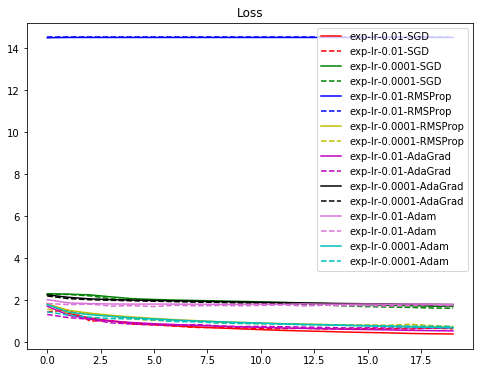

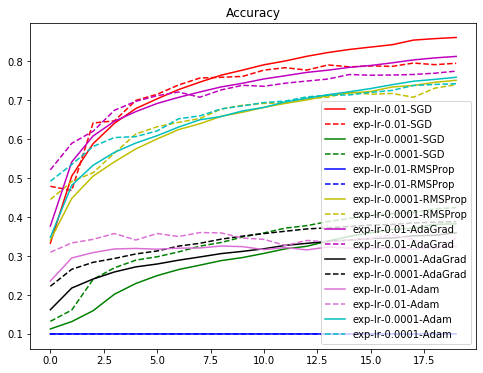

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "orchid", "c"]
color_num = 0

plt.figure(figsize=(8,6))
for i, cond in enumerate(SGD_results.keys()):
    plt.plot(range(len(SGD_results[cond]['train-loss'])),SGD_results[cond]['train-loss'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(SGD_results[cond]['valid-loss'])),SGD_results[cond]['valid-loss'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(RMSProp_results.keys()):
    plt.plot(range(len(RMSProp_results[cond]['train-loss'])),RMSProp_results[cond]['train-loss'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(RMSProp_results[cond]['valid-loss'])),RMSProp_results[cond]['valid-loss'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(AdaGrad_results.keys()):
    plt.plot(range(len(AdaGrad_results[cond]['train-loss'])),AdaGrad_results[cond]['train-loss'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(AdaGrad_results[cond]['valid-loss'])),AdaGrad_results[cond]['valid-loss'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(Adam_results.keys()):
    plt.plot(range(len(Adam_results[cond]['train-loss'])),Adam_results[cond]['train-loss'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(Adam_results[cond]['valid-loss'])),Adam_results[cond]['valid-loss'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
    
plt.title("Loss")
plt.legend()
plt.show()

color_num = 0
plt.figure(figsize=(8,6))    
for i, cond in enumerate(SGD_results.keys()):
    plt.plot(range(len(SGD_results[cond]['train-acc'])),SGD_results[cond]['train-acc'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(SGD_results[cond]['valid-acc'])),SGD_results[cond]['valid-acc'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(RMSProp_results.keys()):
    plt.plot(range(len(RMSProp_results[cond]['train-acc'])),RMSProp_results[cond]['train-acc'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(RMSProp_results[cond]['valid-acc'])),RMSProp_results[cond]['valid-acc'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(AdaGrad_results.keys()):
    plt.plot(range(len(AdaGrad_results[cond]['train-acc'])),AdaGrad_results[cond]['train-acc'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(AdaGrad_results[cond]['valid-acc'])),AdaGrad_results[cond]['valid-acc'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
for i, cond in enumerate(Adam_results.keys()):
    plt.plot(range(len(Adam_results[cond]['train-acc'])),Adam_results[cond]['train-acc'], '-', label=cond, color=color_bar[color_num])
    plt.plot(range(len(Adam_results[cond]['valid-acc'])),Adam_results[cond]['valid-acc'], '--', label=cond, color=color_bar[color_num])
    color_num+=1
plt.title("Accuracy")
plt.legend()
plt.show()